# Pathway analysis

In [1]:
import gseapy
import scanpy as sc

In [2]:
adata = sc.read("/colab_melanoma/malignant_pos_scVI.h5ad")

In [22]:
adata.shape

(2147, 3000)

In [4]:
adata.obs['leiden_0.3'].value_counts()

1    662
0    657
2    436
3    300
4     92
Name: leiden_0.3, dtype: int64

In [5]:
gene_set_names = gseapy.get_library_name(database='Human')
print(gene_set_names)

['ARCHS4_Cell-lines', 'ARCHS4_IDG_Coexp', 'ARCHS4_Kinases_Coexp', 'ARCHS4_TFs_Coexp', 'ARCHS4_Tissues', 'Achilles_fitness_decrease', 'Achilles_fitness_increase', 'Aging_Perturbations_from_GEO_down', 'Aging_Perturbations_from_GEO_up', 'Allen_Brain_Atlas_10x_scRNA_2021', 'Allen_Brain_Atlas_down', 'Allen_Brain_Atlas_up', 'Azimuth_Cell_Types_2021', 'BioCarta_2013', 'BioCarta_2015', 'BioCarta_2016', 'BioPlanet_2019', 'BioPlex_2017', 'CCLE_Proteomics_2020', 'CORUM', 'COVID-19_Related_Gene_Sets', 'COVID-19_Related_Gene_Sets_2021', 'Cancer_Cell_Line_Encyclopedia', 'CellMarker_Augmented_2021', 'ChEA_2013', 'ChEA_2015', 'ChEA_2016', 'Chromosome_Location', 'Chromosome_Location_hg19', 'ClinVar_2019', 'DSigDB', 'Data_Acquisition_Method_Most_Popular_Genes', 'DepMap_WG_CRISPR_Screens_Broad_CellLines_2019', 'DepMap_WG_CRISPR_Screens_Sanger_CellLines_2019', 'Descartes_Cell_Types_and_Tissue_2021', 'DisGeNET', 'Disease_Perturbations_from_GEO_down', 'Disease_Perturbations_from_GEO_up', 'Disease_Signatures

In [6]:
sc.tl.rank_genes_groups(adata, 'leiden_0.3', method='wilcoxon', key_added = "wilcoxon")

In [7]:
glist = sc.get.rank_genes_groups_df(adata, group='1', 
                                    key='wilcoxon', log2fc_min=0.25, 
                                    pval_cutoff=0.01)

In [9]:
glist0 = sc.get.rank_genes_groups_df(adata, group = '1', key = 'wilcoxon')
glist0 = glist0.head(50)
glist0 = glist0[~glist0['names'].str.contains("ASDFASDF", na=True)]
glist0 = glist0["names"].tolist()
enr_res0 = gseapy.enrichr(gene_list=glist0, organism='Human', gene_sets='MSigDB_Hallmark_2020', description = 'pathway', cutoff = 0.5)
enr_res0.results.head()

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes
0,MSigDB_Hallmark_2020,Epithelial Mesenchymal Transition,7/200,6.247575e-07,0.000016,0,0,16.664538,238.067958,SPARC;SERPINE2;CALD1;PMP22;PLOD3;CD59;TIMP1
1,MSigDB_Hallmark_2020,Myogenesis,6/200,1.021980e-05,0.000128,0,0,13.886598,159.573448,SPARC;ERBB3;APOD;NAV2;AEBP1;CNN3
2,MSigDB_Hallmark_2020,Apoptosis,5/161,5.023041e-05,0.000419,0,0,14.098291,139.557427,ERBB3;CAV1;LMNA;TIMP2;TIMP1
3,MSigDB_Hallmark_2020,Coagulation,4/138,3.906860e-04,0.002442,0,0,12.859182,100.913800,SPARC;S100A13;TIMP1;GNG12
4,MSigDB_Hallmark_2020,Complement,4/200,1.559881e-03,0.007799,0,0,8.763975,56.642851,S100A13;TIMP2;CD59;TIMP1


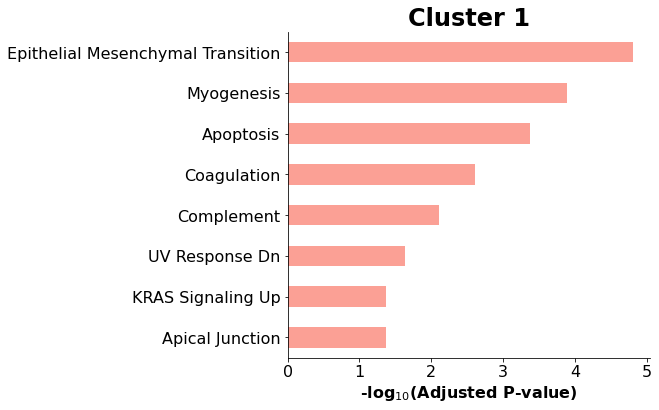

In [10]:
gseapy.barplot(enr_res0.res2d, title = 'Cluster 1')

In [11]:
glist0 = sc.get.rank_genes_groups_df(adata, group = '1', key = 'wilcoxon')
glist0 = glist0.head(50)
glist0 = glist0[~glist0['names'].str.contains("ASDFASDF", na=True)]
glist0 = glist0["names"].tolist()
enr_res0 = gseapy.enrichr(gene_list=glist0, organism='Human', gene_sets='KEGG_2019_Human', description = 'pathway', cutoff = 1)
enr_res0.results.head()

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes
0,KEGG_2019_Human,Melanogenesis,3/101,0.002062,0.156745,0,0,12.930091,79.958003,EDNRB;MITF;TYR
1,KEGG_2019_Human,Tight junction,3/170,0.008826,0.224238,0,0,7.561345,35.765371,TJP1;CTTN;RAB13
2,KEGG_2019_Human,Proteoglycans in cancer,3/201,0.013862,0.224238,0,0,6.367505,27.244120,ERBB3;CTTN;CAV1
3,KEGG_2019_Human,Adherens junction,2/72,0.014005,0.224238,0,0,11.833333,50.508866,TJP1;CTNND1
4,KEGG_2019_Human,Bacterial invasion of epithelial cells,2/74,0.014753,0.224238,0,0,11.503472,48.502567,CTTN;CAV1


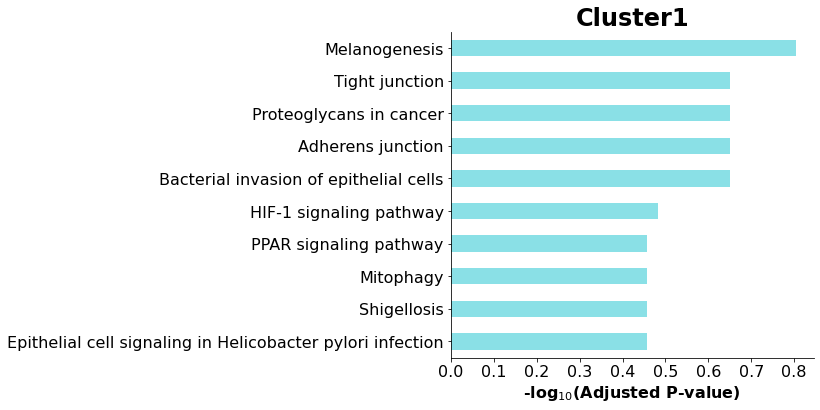

In [15]:
gseapy.barplot(enr_res0.res2d, title = 'Cluster1', cutoff=1, color="#63d6de")

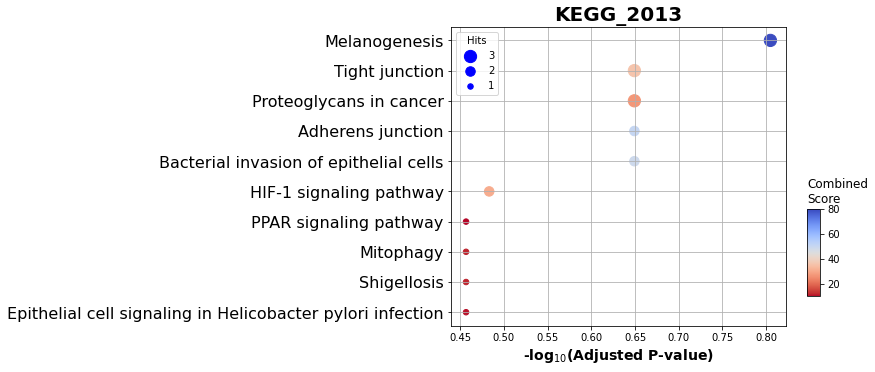

In [21]:
gseapy.dotplot(enr_res0.res2d, title='KEGG_2013', cutoff=1, cmap='coolwarm_r')